In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import datetime as dt 
import seaborn as sns

In [2]:
df_05 = pd.read_csv('/Users/mariu/Desktop/Masterarbeit/archive/202205-divvy-tripdata.csv')
df_06 = pd.read_csv('/Users/mariu/Desktop/Masterarbeit/archive/202206-divvy-tripdata.csv')
df_07 = pd.read_csv('/Users/mariu/Desktop/Masterarbeit/archive/202207-divvy-tripdata.csv')
df_08 = pd.read_csv('/Users/mariu/Desktop/Masterarbeit/archive/202208-divvy-tripdata.csv')
df_09 = pd.read_csv('/Users/mariu/Desktop/Masterarbeit/archive/202209-divvy-publictripdata.csv')
df_10 = pd.read_csv('/Users/mariu/Desktop/Masterarbeit/archive/202210-divvy-tripdata.csv')
df_11 = pd.read_csv('/Users/mariu/Desktop/Masterarbeit/archive/202211-divvy-tripdata.csv')
df_12 = pd.read_csv('/Users/mariu/Desktop/Masterarbeit/archive/202212-divvy-tripdata.csv')
df_01 = pd.read_csv('/Users/mariu/Desktop/Masterarbeit/archive/202301-divvy-tripdata.csv')
df_02 = pd.read_csv('/Users/mariu/Desktop/Masterarbeit/archive/202302-divvy-tripdata.csv')
df_03 = pd.read_csv('/Users/mariu/Desktop/Masterarbeit/archive/202303-divvy-tripdata.csv')
df_04 = pd.read_csv('/Users/mariu/Desktop/Masterarbeit/archive/202304-divvy-tripdata.csv')

df = pd.concat([df_05, df_06, df_07, df_08, df_09, df_10, df_11, df_12, df_01, df_02, df_03, df_04], ignore_index=True)

# Gruppieren nach Stationsname und Berechnen der Durchschnittskoordinaten
grouped_stations = df.groupby('start_station_name').agg(
    avg_lat=('start_lat', 'mean'),
    avg_lng=('start_lng', 'mean')
).reset_index()

# Gruppieren nach Stationsname und Behalten der ersten Koordinate jeder Gruppe
unique_stations = df.groupby('start_station_name').first().reset_index()


In [4]:
def classify_poi(poi):
    # Tags, die auf "Leisure" hinweisen
    leisure_tags = ['park', 'museum', 'cinema', 'theatre', 'art_gallery', 'cafe', 'restaurant', 'bar']

    # Tags, die auf "Business" hinweisen
    business_tags = ['office', 'commercial', 'industrial', 'retail', 'shop']

    # Tags, die auf "Residential" hinweisen
    residential_tags = ['residential', 'apartments', 'house', 'housing']

    # Überprüfen der POI-Tags
    for tag in poi:
        if tag in leisure_tags:
            return 'Leisure'
        elif tag in business_tags:
            return 'Business'
        elif tag in residential_tags:
            return 'Residential'

    return 'Other'  # Standardkategorie, falls keine Übereinstimmung gefunden wurde


In [4]:
import osmnx as ox

def get_pois(lat, lng, dist=250):
    try:
        point = (lat, lng)
        tags = {'amenity': True, 'shop': True, 'tourism': True}
        pois = ox.features_from_point(point, tags=tags, dist=dist)
        return pois if not pois.empty else pd.DataFrame()
    except Exception as e:
        return pd.DataFrame()  # Rückgabe eines leeren DataFrame im Fehlerfall

unique_stations['pois'] = unique_stations.apply(lambda row: get_pois(row['start_lat'], row['start_lng']), axis=1)


In [8]:
unique_stations['pois']

0                   Empty DataFrame
Columns: []
Index: []
1                                     amenity drive_th...
2                                       amenity   bran...
3                                          amenity  el...
4                                                     ...
                              ...                        
1717                                     amenity  ele ...
1718                                       amenity   b...
1719                                    amenity  brand...
1720                                                  ...
1721                            addr:city addr:housenu...
Name: pois, Length: 1722, dtype: object

In [19]:
import osmnx as ox

def get_pois(lat, lng, dist=100):
    try:
        point = (lat, lng)
        tags = {'amenity': True, 'shop': True, 'tourism': True}
        pois = ox.features_from_point(point, tags=tags, dist=dist)
        return pois if not pois.empty else pd.DataFrame()
    except Exception as e:
        return pd.DataFrame()  # Rückgabe eines leeren DataFrame im Fehlerfall

grouped_stations['pois'] = grouped_stations.apply(lambda row: get_pois(row['avg_lat'], row['avg_lng']), axis=1)

In [5]:

leisure_tags = ['park', 'cinema', 'theatre', 'museum', 'art_gallery', 'nightclub', 'zoo']
food_drink_tags = ['restaurant', 'cafe', 'bar', 'pub', 'biergarten']
shopping_tags = ['supermarket', 'mall', 'shop', 'boutique', 'marketplace']
business_industrial_tags = ['office', 'industrial', 'commercial', 'factory']
residential_tags = ['residential', 'apartments', 'house', 'housing_estate']
education_research_tags = ['school', 'university', 'college', 'library', 'research_institute']
health_medical_tags = ['hospital', 'clinic', 'pharmacy', 'veterinary', 'dentist']
public_service_tags = ['police', 'fire_station', 'post_office', 'townhall', 'courthouse']
transport_mobility_tags = ['bus_station', 'train_station', 'airport', 'bicycle_parking', 'car_rental']
sport_activity_tags = ['stadium', 'sports_centre', 'gym', 'swimming_pool', 'playground']

all_tags = {
    'Leisure': leisure_tags,
    'Food_Drink': food_drink_tags,
    'Shopping': shopping_tags,
    'Business_Industrial': business_industrial_tags,
    'Residential': residential_tags,
    'Education_Research': education_research_tags,
    'Health_Medical': health_medical_tags,
    'Public_Service': public_service_tags,
    'Transport_Mobility': transport_mobility_tags,
    'Sport_Activity': sport_activity_tags
}


def classify_poi(poi):
    for category, tags in all_tags.items():
        if any(tag in poi for tag in tags):
            return category
    return 'Other'

def classify_station_pois(pois):
    categories = {category: 0 for category in all_tags.keys()} | {'Other': 0}
    if not pois.empty:
        for _, poi in pois.iterrows():
            category = classify_poi(poi)
            categories[category] += 1
    return categories

# Annahme: 'top_50_stations' enthält eine Spalte 'pois', die die POIs für jede Station beinhaltet
grouped_stations['poi_categories'] = grouped_stations['pois'].apply(classify_station_pois)




KeyError: 'pois'

In [9]:

leisure_tags = ['park', 'cinema', 'theatre', 'museum', 'art_gallery', 'nightclub', 'zoo']
food_drink_tags = ['restaurant', 'cafe', 'bar', 'pub', 'biergarten']
shopping_tags = ['supermarket', 'mall', 'shop', 'boutique', 'marketplace']
business_industrial_tags = ['office', 'industrial', 'commercial', 'factory']
residential_tags = ['residential', 'apartments', 'house', 'housing_estate']
education_research_tags = ['school', 'university', 'college', 'library', 'research_institute']
health_medical_tags = ['hospital', 'clinic', 'pharmacy', 'veterinary', 'dentist']
public_service_tags = ['police', 'fire_station', 'post_office', 'townhall', 'courthouse']
transport_mobility_tags = ['bus_station', 'train_station', 'airport', 'bicycle_parking', 'car_rental']
sport_activity_tags = ['stadium', 'sports_centre', 'gym', 'swimming_pool', 'playground']

all_tags = {
    'Leisure': leisure_tags,
    'Food_Drink': food_drink_tags,
    'Shopping': shopping_tags,
    'Business_Industrial': business_industrial_tags,
    'Residential': residential_tags,
    'Education_Research': education_research_tags,
    'Health_Medical': health_medical_tags,
    'Public_Service': public_service_tags,
    'Transport_Mobility': transport_mobility_tags,
    'Sport_Activity': sport_activity_tags
}


def classify_poi(poi):
    for category, tags in all_tags.items():
        if any(tag in poi for tag in tags):
            return category
    return 'Other'

def classify_station_pois(pois):
    categories = {category: 0 for category in all_tags.keys()} | {'Other': 0}
    if not pois.empty:
        for _, poi in pois.iterrows():
            category = classify_poi(poi)
            categories[category] += 1
    return categories

# Annahme: 'top_50_stations' enthält eine Spalte 'pois', die die POIs für jede Station beinhaltet
unique_stations['poi_categories'] = unique_stations['pois'].apply(classify_station_pois)


In [10]:
unique_stations

,start_station_name,ride_id,rideable_type,started_at,ended_at,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,pois,poi_categories
0,10101 S Stony Island Ave,F715C83C9A4E9B18,electric_bike,2022-08-13 19:58:36,2022-08-13 20:25:52,922,Phillips Ave & 83rd St,582,41.710000,-87.580000,41.744531,-87.565060,casual,Empty DataFrame Columns: [] Index: [],"{'Leisure': 0, 'Food_Drink': 0, 'Shopping': 0,..."
1,111th St - Morgan Park Metra,54932094E964F02A,electric_bike,2022-05-09 16:50:29,2022-05-09 16:57:23,682,Walden Pkwy & 103rd St,693,41.690000,-87.670000,41.700000,-87.680000,member,amenity drive_th...,"{'Leisure': 0, 'Food_Drink': 0, 'Shopping': 0,..."
2,2112 W Peterson Ave,0B3343C0A131B87E,electric_bike,2022-05-07 13:39:17,2022-05-07 14:06:41,KA1504000155,Broadway & Berwyn Ave,13109,41.991189,-87.683500,41.978353,-87.659753,member,amenity bran...,"{'Leisure': 0, 'Food_Drink': 0, 'Shopping': 17..."
3,410,0DA511E177690708,electric_bike,2023-04-27 07:36:16,2023-04-27 07:48:35,410,LaSalle St & Washington St,13006,41.900000,-87.690000,41.920000,-87.690000,casual,amenity el...,"{'Leisure': 0, 'Food_Drink': 0, 'Shopping': 22..."
4,532 E 43rd St,66C14540F47D3BE4,electric_bike,2022-05-27 10:53:54,2022-05-27 11:07:59,913,MLK Jr Dr & 29th St,TA1307000139,41.820000,-87.610000,41.842052,-87.617000,casual,...,"{'Leisure': 0, 'Food_Drink': 0, 'Shopping': 0,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1717,Yale Ave & 119th St,C709DDFE42370ABF,electric_bike,2022-07-12 14:22:38,2022-07-12 14:32:07,588,State St & 123rd St,20210,41.680000,-87.630000,41.710000,-87.620000,casual,amenity ele ...,"{'Leisure': 0, 'Food_Drink': 0, 'Shopping': 0,..."
1718,Yates Blvd & 75th St,C8F57483B95F50C9,electric_bike,2022-05-26 21:24:24,2022-05-26 21:28:24,KA1503000024,Jeffery Blvd & 71st St,KA1503000018,41.758742,-87.566428,41.766638,-87.576450,member,amenity b...,"{'Leisure': 0, 'Food_Drink': 0, 'Shopping': 21..."
1719,Yates Blvd & 93rd St,B890FDC60ACC660B,classic_bike,2022-05-13 14:21:13,2022-05-13 14:26:38,20237,Clyde Ave & 87th St,20230,41.726166,-87.566276,41.737151,-87.572740,member,amenity brand...,"{'Leisure': 0, 'Food_Drink': 0, 'Shopping': 0,..."
1720,Yates Blvd & Exchange Ave,AFCC16606B0289C7,electric_bike,2022-05-24 15:21:28,2022-05-24 15:46:12,905,Harper Ave & 59th St,KA1503000070,41.770000,-87.570000,41.770000,-87.570000,member,...,"{'Leisure': 0, 'Food_Drink': 0, 'Shopping': 0,..."


In [27]:
# Erstellen Sie ein leeres DataFrame für die umstrukturierten Daten
columns = list(all_tags.keys()) + ['Other']
poi_counts_df = pd.DataFrame(columns=columns)

# Iterieren Sie über jede Station in unique_stations
for index, row in unique_stations.iterrows():
    # Klassifizieren Sie die POIs für die Station
    poi_counts = classify_station_pois(row['pois'])
    
    # Fügen Sie die gezählten Werte dem neuen DataFrame hinzu
    poi_counts_df = poi_counts_df.append(poi_counts, ignore_index=True)

# Fügen Sie die Stationsnamen oder -IDs als Index oder als separate Spalte zum poi_counts_df hinzu
poi_counts_df['start_station_name'] = unique_stations['start_station_name'].values  # oder 'station_id' entsprechend Ihrer Datenstruktur

# Setzen Sie den Stationsnamen oder -ID als Index, wenn gewünscht
poi_counts_df.set_index('start_station_name', inplace=True)

print(poi_counts_df.head())


/var/folders/y8/j3l3spt14jd5q6r19v3l8_800000gn/T/ipykernel_7212/1570466085.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  poi_counts_df = poi_counts_df.append(poi_counts, ignore_index=True)
/var/folders/y8/j3l3spt14jd5q6r19v3l8_800000gn/T/ipykernel_7212/1570466085.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  poi_counts_df = poi_counts_df.append(poi_counts, ignore_index=True)
/var/folders/y8/j3l3spt14jd5q6r19v3l8_800000gn/T/ipykernel_7212/1570466085.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  poi_counts_df = poi_counts_df.append(poi_counts, ignore_index=True)
/var/folders/y8/j3l3spt14jd5q6r19v3l8_800000gn/T/ipykernel_7212/1570466085.py:11: FutureWarning: The frame.append method is deprecated and will b

                             Leisure Food_Drink Shopping Business_Industrial  \
start_station_name                                                             
10101 S Stony Island Ave           0          0        0                   0   
111th St - Morgan Park Metra       0          0        0                   0   
2112 W Peterson Ave                0          0       17                   0   
410                                0          0       22                   0   
532 E 43rd St                      0          0        0                   0   

                             Residential Education_Research Health_Medical  \
start_station_name                                                           
10101 S Stony Island Ave               0                  0              0   
111th St - Morgan Park Metra           0                  0              0   
2112 W Peterson Ave                    0                  0              0   
410                                    0         

/var/folders/y8/j3l3spt14jd5q6r19v3l8_800000gn/T/ipykernel_7212/1570466085.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  poi_counts_df = poi_counts_df.append(poi_counts, ignore_index=True)
/var/folders/y8/j3l3spt14jd5q6r19v3l8_800000gn/T/ipykernel_7212/1570466085.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  poi_counts_df = poi_counts_df.append(poi_counts, ignore_index=True)
/var/folders/y8/j3l3spt14jd5q6r19v3l8_800000gn/T/ipykernel_7212/1570466085.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  poi_counts_df = poi_counts_df.append(poi_counts, ignore_index=True)
/var/folders/y8/j3l3spt14jd5q6r19v3l8_800000gn/T/ipykernel_7212/1570466085.py:11: FutureWarning: The frame.append method is deprecated and will b

In [9]:
# Berechnen der Gesamtanzahl der POIs in jeder Kategorie
total_pois_per_category = poi_counts_df.sum()

# Sortieren der Ergebnisse für eine bessere Visualisierung
sorted_totals = total_pois_per_category.sort_values(ascending=False)

# Anzeigen der Ergebnisse
print(sorted_totals)


TypeError: '>' not supported between instances of 'numpy.ndarray' and 'str'

In [10]:
# Extrahieren der numerischen Daten, ohne die Spalte 'start_station_name'
numeric_data = poi_counts_df.drop(columns=['start_station_name']).apply(pd.to_numeric, errors='coerce')

# Berechnen der Summe über die numerischen Spalten
total_pois_per_category = numeric_data.sum()

# Sortieren der Ergebnisse
sorted_totals = total_pois_per_category.sort_values(ascending=False)




In [11]:
sorted_totals

Shopping               40318
Leisure                 8445
Other                   7297
Food_Drink              3764
Residential             2430
Business_Industrial     1094
Transport_Mobility       409
Sport_Activity           256
dtype: int64

In [6]:
import osmnx as ox
import pandas as pd

def get_pois(lat, lng, dist=250):  # Erhöht den Radius für eine breitere Abdeckung
    try:
        point = (lat, lng)
        # Integrieren Sie Wohngebiete und andere Kategorien von Interesse
        tags = {
            'landuse': ['residential'],
            'amenity': True,
            'leisure': True,
            'shop': True,
            'tourism': True,
            'office': True
        }
        # Verwenden Sie die aktualisierte Funktion `features_from_point`
        pois = ox.features_from_point(point, tags, dist=dist)
        if not pois.empty:
            pois['category'] = pois.apply(classify_poi, axis=1)  # Klassifizieren Sie jede POI basierend auf Tags
        return pois if not pois.empty else pd.DataFrame()
    except Exception as e:
        print(e)  # Drucke Fehler, falls vorhanden
        return pd.DataFrame()

# Anwenden der aktualisierten get_pois Funktion auf jede Station
unique_stations['pois'] = unique_stations.apply(lambda row: get_pois(row['start_lat'], row['start_lng']), axis=1)

# Erstellen eines neuen DataFrames zur Speicherung der Ergebnisse
poi_data = []

# Extrahieren der klassifizierten POI-Informationen für jede Station
for index, row in unique_stations.iterrows():
    if not row['pois'].empty:
        for _, poi_row in row['pois'].iterrows():
            poi_data.append({
                'start_station_name': row['start_station_name'],
                'category': poi_row['category'],
                'geometry': poi_row['geometry']
            })

# Konvertieren in DataFrame
poi_df = pd.DataFrame(poi_data)

# Zählen der POIs pro Kategorie und Station
poi_counts_df = poi_df.groupby(['start_station_name', 'category']).size().unstack(fill_value=0)

print(poi_counts_df.head())


KeyboardInterrupt: 

In [46]:
poi_counts_df.to_csv('poi_counts_df.csv')

In [43]:
poi_counts_df.to_csv('poi_counts_df_250.csv')

In [24]:
poi_counts_df = pd.read_csv('/Users/mariu/master_thesis/poi_counts_df.csv')

In [7]:
poi_counts_df = pd.read_csv('/Users/mariu/master_thesis/poi_counts_df_250.csv')

In [8]:
poi_counts_df.sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of                 start_station_name  Business_Industrial  Food_Drink  Leisure  \
0         10101 S Stony Island Ave                    0           0        0   
1     111th St - Morgan Park Metra                    0           0        0   
2              2112 W Peterson Ave                    0           0        0   
3                              410                    0           0        0   
4                    532 E 43rd St                    0           0        0   
...                            ...                  ...         ...      ...   
1716           Yale Ave & 119th St                    0           0        0   
1717          Yates Blvd & 75th St                    0           0        0   
1718          Yates Blvd & 93rd St                    0           0        0   
1719     Yates Blvd & Exchange Ave                    0           0        0   
1720                Zapata Academy                    0   

In [40]:
import osmnx as ox
import pandas as pd

def get_residential_areas(lat, lng, dist=1000):  # Suche in einem Radius von 1000 Metern
    try:
        point = (lat, lng)
        tags = {'landuse': 'residential'}
        gdf = ox.geometries_from_point(point, tags=tags, dist=dist)
        return gdf if not gdf.empty else pd.DataFrame()
    except Exception as e:
        print(e)  # Drucke Fehler, falls vorhanden
        return pd.DataFrame()

# Annahme: 'unique_stations' ist Ihr DataFrame mit den Stationen und Koordinaten
# Erstellen eines neuen DataFrames zur Speicherung der Ergebnisse
residential_areas_results = pd.DataFrame()

# Anwenden der Funktion auf jede Station in 'unique_stations'
for index, row in unique_stations.iterrows():
    gdf = get_residential_areas(row['start_lat'], row['start_lng'], dist=1000)
    if not gdf.empty:
        gdf['start_station_name'] = row['start_station_name']  # Fügen Sie den Stationsnamen zu jedem Ergebnis hinzu
        residential_areas_results = pd.concat([residential_areas_results, gdf])

# Zurücksetzen des Index im Ergebnis-DataFrame
residential_areas_results.reset_index(drop=True, inplace=True)

# Überprüfung der Ergebnisse
print(residential_areas_results.head())


/var/folders/y8/j3l3spt14jd5q6r19v3l8_800000gn/T/ipykernel_7212/870654615.py:8: UserWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in a future release.
  gdf = ox.geometries_from_point(point, tags=tags, dist=dist)
/var/folders/y8/j3l3spt14jd5q6r19v3l8_800000gn/T/ipykernel_7212/870654615.py:8: UserWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in a future release.
  gdf = ox.geometries_from_point(point, tags=tags, dist=dist)
/var/folders/y8/j3l3spt14jd5q6r19v3l8_800000gn/T/ipykernel_7212/870654615.py:8: UserWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module a

No data elements in server response. Check log and query location/tags.


/var/folders/y8/j3l3spt14jd5q6r19v3l8_800000gn/T/ipykernel_7212/870654615.py:8: UserWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in a future release.
  gdf = ox.geometries_from_point(point, tags=tags, dist=dist)
/var/folders/y8/j3l3spt14jd5q6r19v3l8_800000gn/T/ipykernel_7212/870654615.py:8: UserWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in a future release.
  gdf = ox.geometries_from_point(point, tags=tags, dist=dist)
/var/folders/y8/j3l3spt14jd5q6r19v3l8_800000gn/T/ipykernel_7212/870654615.py:8: UserWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module a

                                               nodes      landuse source  \
0  [2264936787, 2406538380, 2406538351, 240653837...  residential   Bing   
1  [2406538841, 2406538844, 2406538850, 240653883...  residential   Bing   
2  [2201298818, 2201298719, 2201298734, 220129930...  residential   Bing   
3  [2201299076, 2201298779, 10172943029, 10172943...  residential   Bing   
4  [2252266222, 2252265972, 2252266281, 225226626...  residential   Bing   

                                            geometry  \
0  POLYGON ((-87.56876 41.70810, -87.56030 41.708...   
1  POLYGON ((-87.56805 41.70800, -87.56804 41.707...   
2  POLYGON ((-87.68573 41.68441, -87.68558 41.680...   
3  POLYGON ((-87.68179 41.69095, -87.68181 41.691...   
4  POLYGON ((-87.67108 41.69131, -87.67145 41.688...   

             start_station_name addr:city addr:housenumber addr:postcode  \
0      10101 S Stony Island Ave       NaN              NaN           NaN   
1      10101 S Stony Island Ave       NaN             

In [41]:
residential_areas_results

,nodes,landuse,source,geometry,start_station_name,addr:city,addr:housenumber,addr:postcode,addr:state,addr:street,...,area,architect,start_date,note,gnis:county_id,gnis:created,gnis:state_id,description,contact:yelp,is_in
0,"[2264936787, 2406538380, 2406538351, 240653837...",residential,Bing,"POLYGON ((-87.56876 41.70810, -87.56030 41.708...",10101 S Stony Island Ave,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"[2406538841, 2406538844, 2406538850, 240653883...",residential,Bing,"POLYGON ((-87.56805 41.70800, -87.56804 41.707...",10101 S Stony Island Ave,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"[2201298818, 2201298719, 2201298734, 220129930...",residential,Bing,"POLYGON ((-87.68573 41.68441, -87.68558 41.680...",111th St - Morgan Park Metra,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"[2201299076, 2201298779, 10172943029, 10172943...",residential,Bing,"POLYGON ((-87.68179 41.69095, -87.68181 41.691...",111th St - Morgan Park Metra,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"[2252266222, 2252265972, 2252266281, 225226626...",residential,Bing,"POLYGON ((-87.67108 41.69131, -87.67145 41.688...",111th St - Morgan Park Metra,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76174,"[10259631128, 10259631129, 10259631130, 101466...",residential,NaN,"POLYGON ((-87.73399 41.83685, -87.72444 41.836...",Zapata Academy,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76175,"[3903727656, 10259631163, 4072433901, 40724339...",residential,NaN,"POLYGON ((-87.73435 41.84635, -87.73416 41.846...",Zapata Academy,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76176,"[11009016813, 11009016814, 11009016815, 110090...",residential,NaN,"POLYGON ((-87.75381 41.84519, -87.75254 41.845...",Zapata Academy,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76177,"[11008738475, 11008738476, 11008738477, 110087...",residential,NaN,"POLYGON ((-87.73556 41.85126, -87.72486 41.851...",Zapata Academy,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
import matplotlib.pyplot as plt

# Beispiel: Visualisierung der POI-Kategorien für die erste Station
station = grouped_stations.iloc[5]
plt.bar(station['poi_categories'].keys(), station['poi_categories'].values())
plt.title(f"POI Kategorien für Station: {station['start_station_name']}")
plt.ylabel("Anzahl der POIs")
plt.show()



KeyError: 'poi_categories'

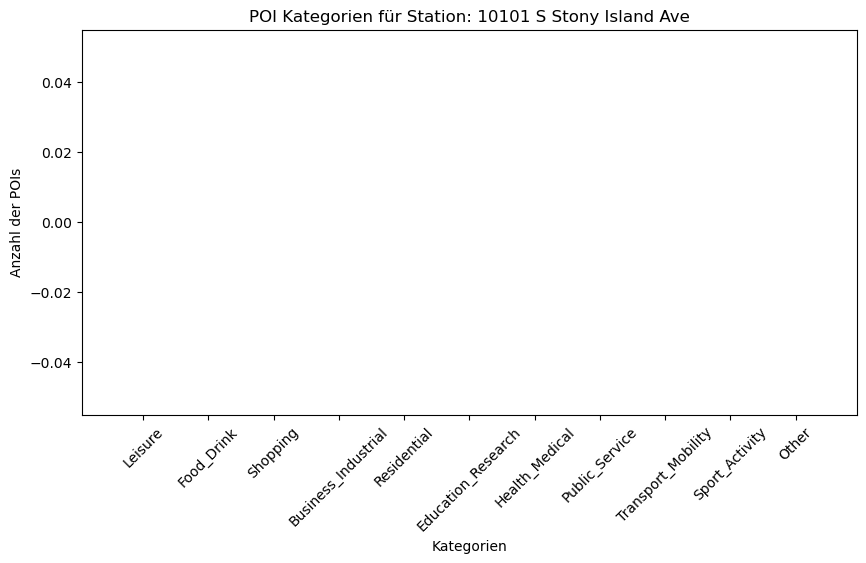

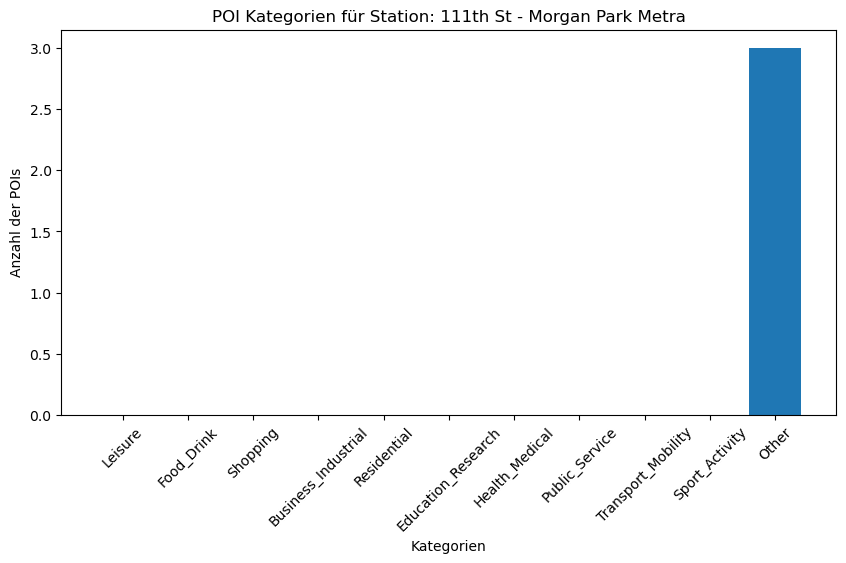

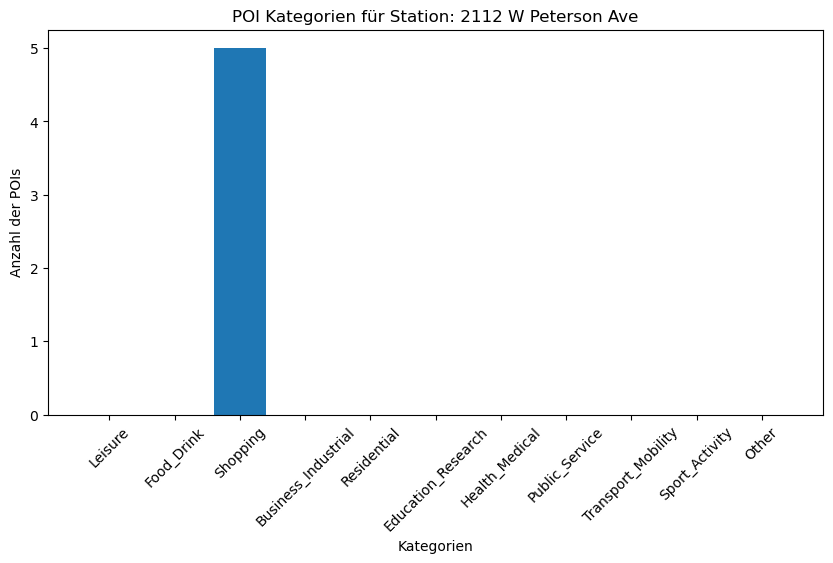

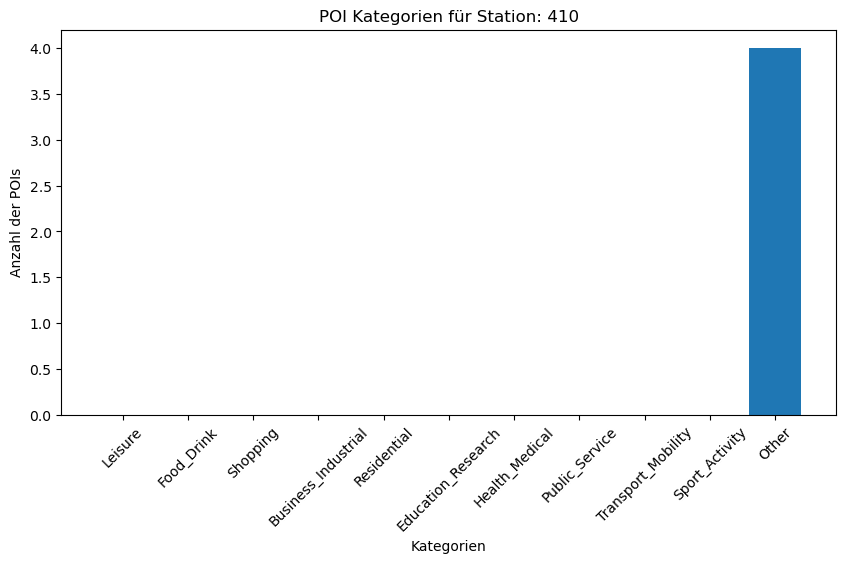

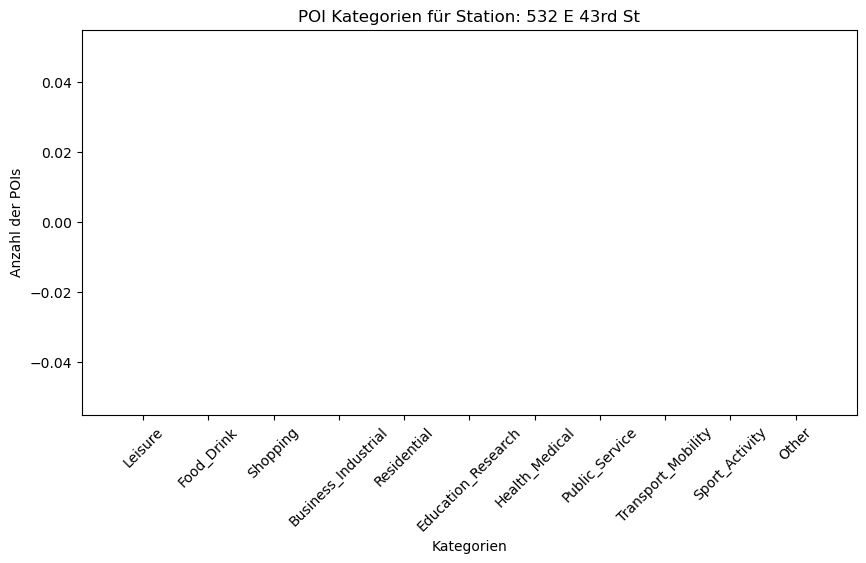

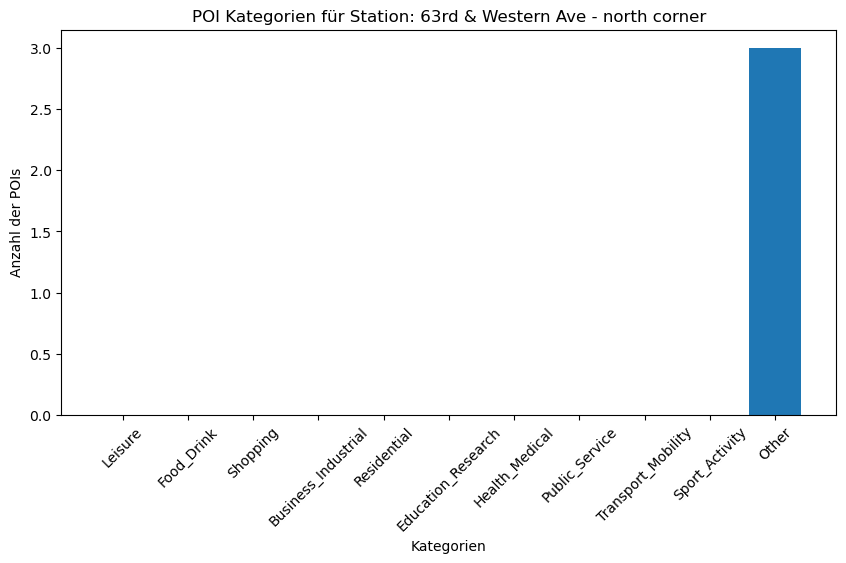

In [10]:
import matplotlib.pyplot as plt

# Einzelne Balkendiagramme für jede Station
for index, row in grouped_stations.iterrows():
    plt.figure(figsize=(10, 5))
    plt.bar(row['poi_categories'].keys(), row['poi_categories'].values())
    plt.title(f"POI Kategorien für Station: {row['start_station_name']}")
    plt.xlabel('Kategorien')
    plt.ylabel('Anzahl der POIs')
    plt.xticks(rotation=45)
    plt.show()

    # Optional: Nach einigen Diagrammen unterbrechen
    if index == 5:  # Begrenzung auf 5 Stationen für das Beispiel
        break


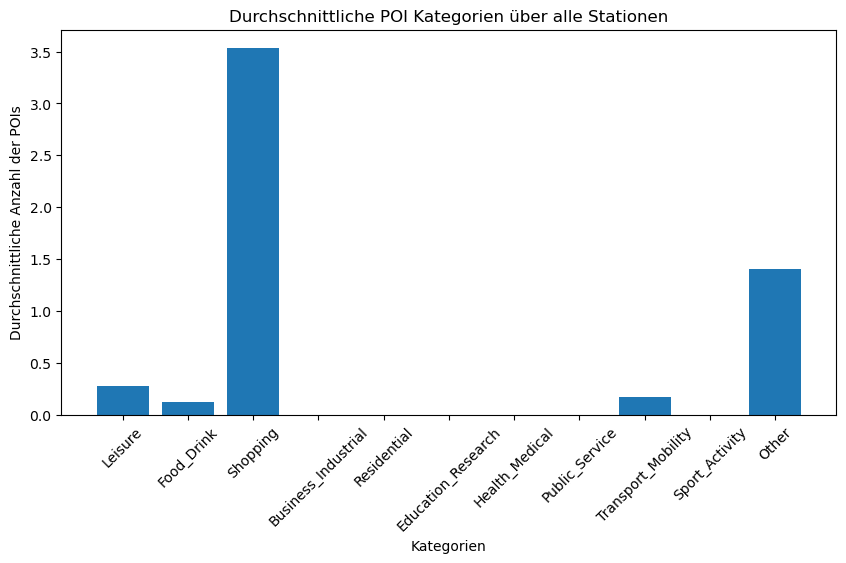

In [11]:
from collections import defaultdict

# Durchschnittliche POIs berechnen
average_pois = defaultdict(int)
num_stations = len(unique_stations)

for poi_categories in grouped_stations['poi_categories']:
    for category, count in poi_categories.items():
        average_pois[category] += count / num_stations

# Durchschnittliche POIs visualisieren
plt.figure(figsize=(10, 5))
plt.bar(average_pois.keys(), average_pois.values())
plt.title("Durchschnittliche POI Kategorien über alle Stationen")
plt.xlabel('Kategorien')
plt.ylabel('Durchschnittliche Anzahl der POIs')
plt.xticks(rotation=45)
plt.show()


/Users/mariu/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/mariu/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/mariu/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/mariu/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/mariu/anacond

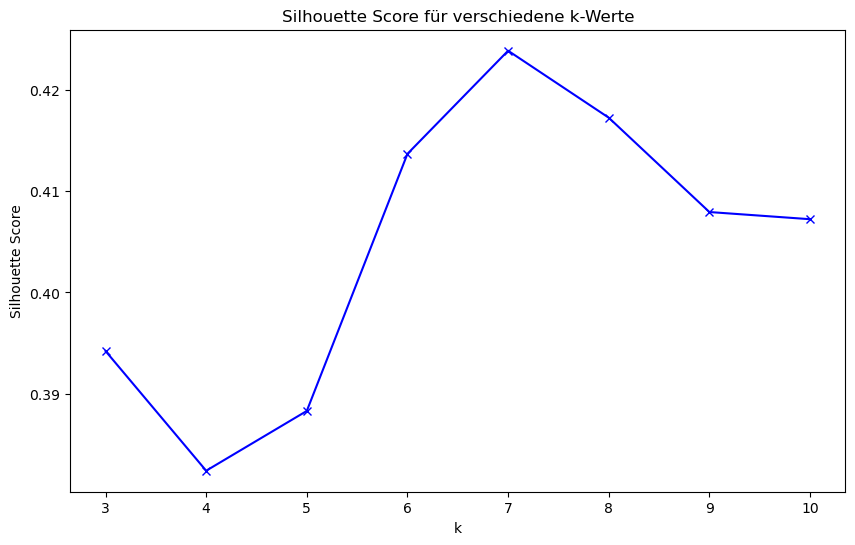

Optimales k: 7


/Users/mariu/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


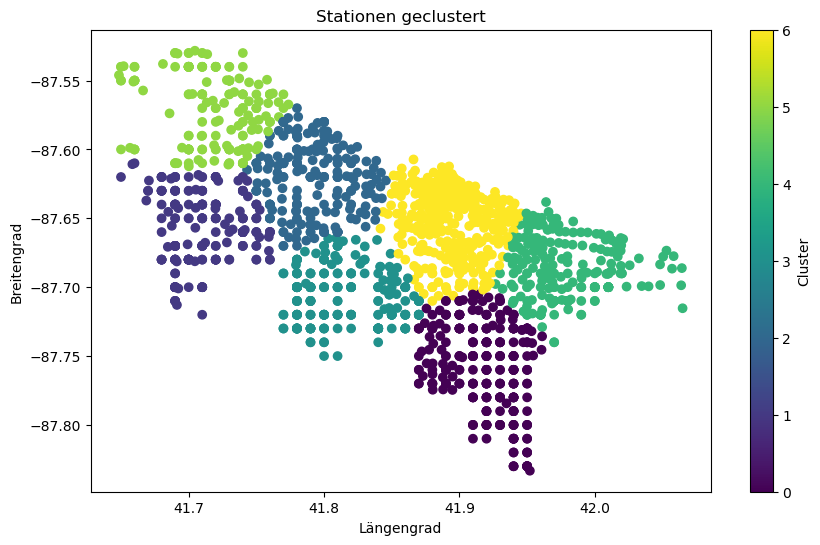

In [16]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Angenommen, dein DataFrame heißt df und hat Spalten 'latitude' und 'longitude'
# Beispiel-Datenstruktur:
# df = pd.DataFrame({
#     'latitude': [49.909763, 49.943038, 49.920553, 49.908977, 49.884731],
#     'longitude': [10.137152, 9.904025, 10.090330, 10.183508, 9.917590]
# })

# Bestimme das optimale k
silhouette_scores = []
K_range = range(3, 11)  # Teste k-Werte von 2 bis 10
for K in K_range:
    kmeans = KMeans(n_clusters=K, random_state=42).fit(unique_stations[['start_lat', 'start_lng']])
    score = silhouette_score(unique_stations[['start_lat', 'start_lng']], kmeans.labels_)
    silhouette_scores.append(score)

# Plot Silhouette Scores
plt.figure(figsize=(10, 6))
plt.plot(K_range, silhouette_scores, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score für verschiedene k-Werte')
plt.show()

# Finde das optimale k basierend auf dem höchsten Silhouette-Score
optimal_k = K_range[silhouette_scores.index(max(silhouette_scores))]
print(f'Optimales k: {optimal_k}')

# Führe K-Means mit dem optimalen k aus
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42).fit(unique_stations[['start_lat', 'start_lng']])
unique_stations['cluster'] = kmeans_optimal.labels_

# Optional: Visualisiere die Cluster
plt.figure(figsize=(10, 6))
plt.scatter(unique_stations['start_lat'], unique_stations['start_lng'], c=unique_stations['cluster'], cmap='viridis', marker='o')
plt.title('Stationen geclustert')
plt.xlabel('Längengrad')
plt.ylabel('Breitengrad')
plt.colorbar(label='Cluster')
plt.show()


In [30]:
# Erstellen eines Mappings von Stationsnamen zu Clustern
station_to_cluster_map = unique_stations.set_index('start_station_name')['cluster'].to_dict()

# Zuordnen der Cluster-IDs zu den entsprechenden Fahrten in df
df['cluster'] = df['start_station_name'].map(station_to_cluster_map)


In [46]:
cluster_counts = df_filtered['cluster'].value_counts()

cluster_counts

6.0    3032682
4.0     627798
2.0     203466
0.0      81888
3.0      25857
5.0      11530
1.0       7502
Name: cluster, dtype: int64

In [33]:
# Umwandlung der 'started_at' und 'ended_at' Spalten in datetime (falls noch nicht geschehen)
df['started_at'] = pd.to_datetime(df['started_at'])
df['ended_at'] = pd.to_datetime(df['ended_at'])

# Berechnung der Dauer jeder Fahrt in Minuten
df['ride_duration'] = (df['ended_at'] - df['started_at']).dt.total_seconds() / 60

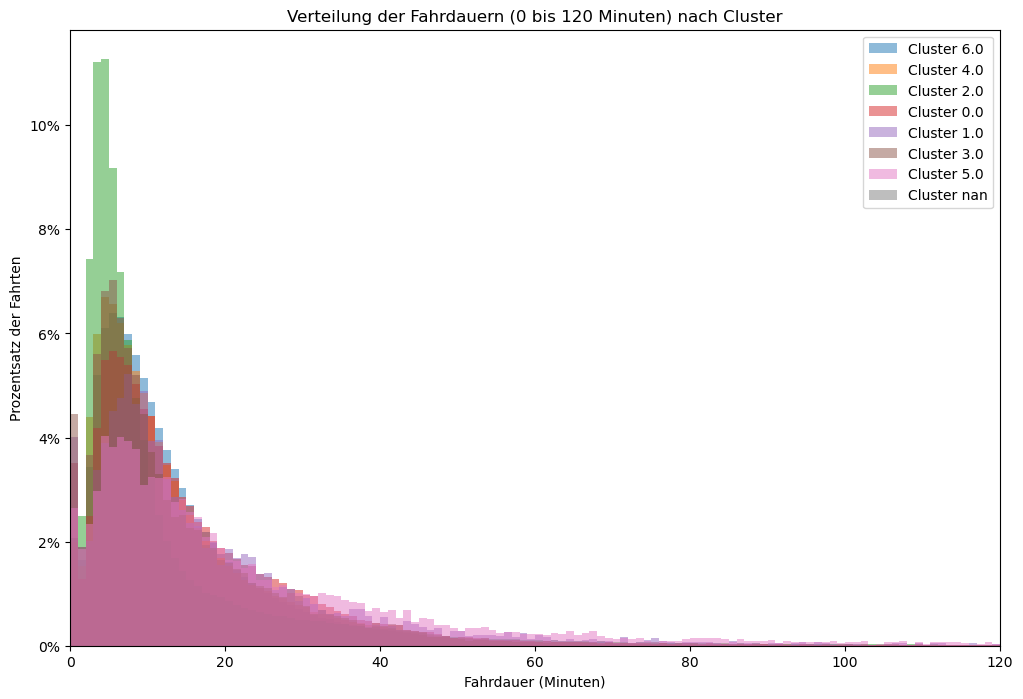

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Annahme: 'cluster' ist die Spalte, die die Cluster-Zugehörigkeit anzeigt
clusters = df['cluster'].unique()

plt.figure(figsize=(12, 8))

# Erstellung eines Histogramms für jeden Cluster
for cluster in clusters:
    subset = df[df['cluster'] == cluster]['ride_duration']
    weights = np.ones_like(subset) / len(subset)  # Gewichte, um die Y-Achse in Prozent umzurechnen
    plt.hist(subset, bins=range(0, 121), weights=weights, alpha=0.5, label=f'Cluster {cluster}')

plt.title('Verteilung der Fahrdauern (0 bis 120 Minuten) nach Cluster')
plt.xlabel('Fahrdauer (Minuten)')
plt.ylabel('Prozentsatz der Fahrten')
plt.xlim(0, 120)  # Beschränkung der X-Achse auf 0 bis 120 Minuten
plt.legend()  # Hinzufügen einer Legende, um die Cluster zu identifizieren

# Anpassung der Y-Achse, um Prozentsätze anzuzeigen
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))

plt.show()


In [41]:
# Angenommen, 'ride_duration' ist in Minuten und bereits im DataFrame 'df' vorhanden
df_filtered = df[(df['ride_duration'] >= 5) & (df['ride_duration'] <= 120)]

# df_filtered enthält jetzt nur Fahrten, deren Dauer zwischen 5 und 120 Minuten liegt


In [43]:
df_filtered

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,cluster,start_hour,ride_duration
0,EC2DE40644C6B0F4,classic_bike,2022-05-23 23:06:58,2022-05-23 23:40:19,Wabash Ave & Grand Ave,TA1307000117,Halsted St & Roscoe St,TA1309000025,41.891466,-87.626761,41.943670,-87.648950,member,6.0,23,33.350000
1,1C31AD03897EE385,classic_bike,2022-05-11 08:53:28,2022-05-11 09:31:22,DuSable Lake Shore Dr & Monroe St,13300,Field Blvd & South Water St,15534,41.880958,-87.616743,41.886349,-87.617517,member,6.0,8,37.900000
2,1542FBEC830415CF,classic_bike,2022-05-26 18:36:28,2022-05-26 18:58:18,Clinton St & Madison St,TA1305000032,Wood St & Milwaukee Ave,13221,41.882242,-87.641066,41.907655,-87.672552,member,6.0,18,21.833333
3,6FF59852924528F8,classic_bike,2022-05-10 07:30:07,2022-05-10 07:38:49,Clinton St & Madison St,TA1305000032,Clark St & Randolph St,TA1305000030,41.882242,-87.641066,41.884576,-87.631890,member,6.0,7,8.700000
4,483C52CAAE12E3AC,classic_bike,2022-05-10 17:31:56,2022-05-10 17:36:57,Clinton St & Madison St,TA1305000032,Morgan St & Lake St,TA1306000015,41.882242,-87.641066,41.885779,-87.651025,member,6.0,17,5.016667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5859054,9BCF1E8BA027EAFA,electric_bike,2023-04-21 07:15:06,2023-04-21 07:41:45,Richmond St & Diversey Ave,15645,Clark St & Ida B Wells Dr,TA1305000009,41.931933,-87.701263,41.875933,-87.630585,member,4.0,7,26.650000
5859056,8B441A6C436E9900,classic_bike,2023-04-29 21:20:21,2023-04-29 21:30:19,Halsted St & 18th St,13099,Blue Island Ave & 18th St,13135,41.857506,-87.645991,41.857556,-87.661535,casual,6.0,21,9.966667
5859057,3980D64BE11540F1,classic_bike,2023-04-24 09:16:05,2023-04-24 09:22:27,Halsted St & 18th St,13099,Blue Island Ave & 18th St,13135,41.857506,-87.645991,41.857556,-87.661535,casual,6.0,9,6.366667
5859058,3EF4B49FF7DAA02C,classic_bike,2023-04-18 07:53:51,2023-04-18 07:59:16,Franklin St & Jackson Blvd,TA1305000025,Clark St & Randolph St,TA1305000030,41.877708,-87.635321,41.884576,-87.631890,casual,6.0,7,5.416667


In [47]:
# Berechnung der Anzahl der Fahrten pro Stunde und Cluster
start_time_distribution_per_cluster = df_filtered.groupby(['cluster', 'start_hour']).size().unstack(fill_value=0)

# Berechnung der Gesamtanzahl der Fahrten pro Cluster
total_rides_per_cluster = start_time_distribution_per_cluster.sum(axis=1)

# Umwandlung der Anzahlen in prozentuale Anteile
percent_distribution_per_cluster = start_time_distribution_per_cluster.div(total_rides_per_cluster, axis=0) * 100




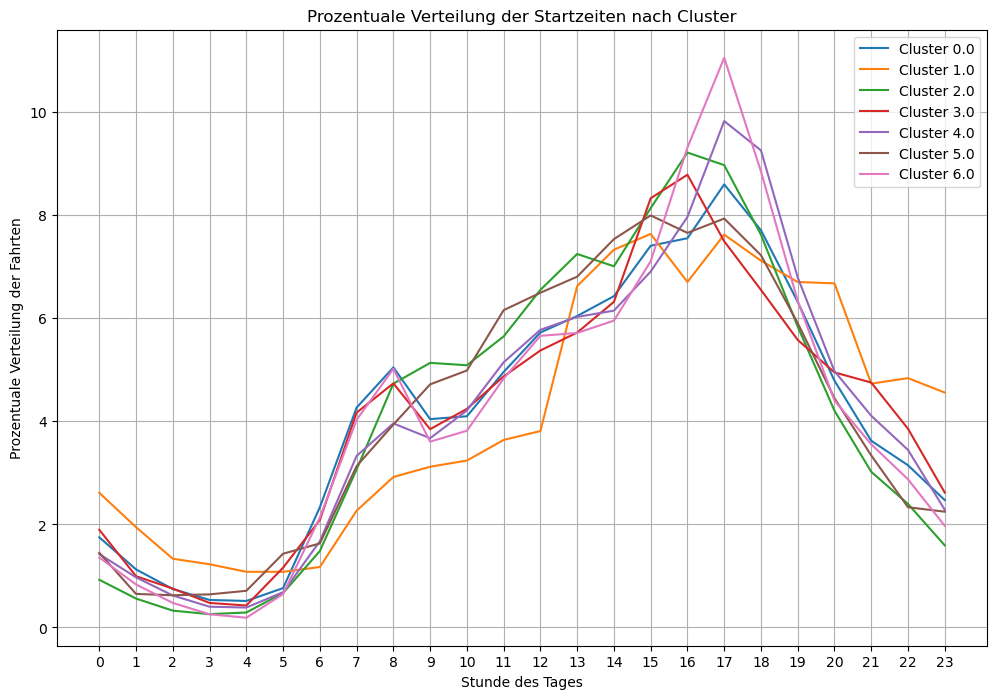

In [48]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
for cluster in percent_distribution_per_cluster.index:
    plt.plot(percent_distribution_per_cluster.columns, percent_distribution_per_cluster.loc[cluster], label=f'Cluster {cluster}')

plt.xlabel('Stunde des Tages')
plt.ylabel('Prozentuale Verteilung der Fahrten')
plt.title('Prozentuale Verteilung der Startzeiten nach Cluster')
plt.legend()
plt.xticks(range(0, 24))  # Setzt X-Achsen-Ticks für jede Stunde des Tages
plt.grid(True)
plt.show()


/var/folders/y8/j3l3spt14jd5q6r19v3l8_800000gn/T/ipykernel_22450/484794673.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['time_interval'] = pd.cut(df_filtered['ride_duration'], bins=np.arange(5, 121, 1), right=False)


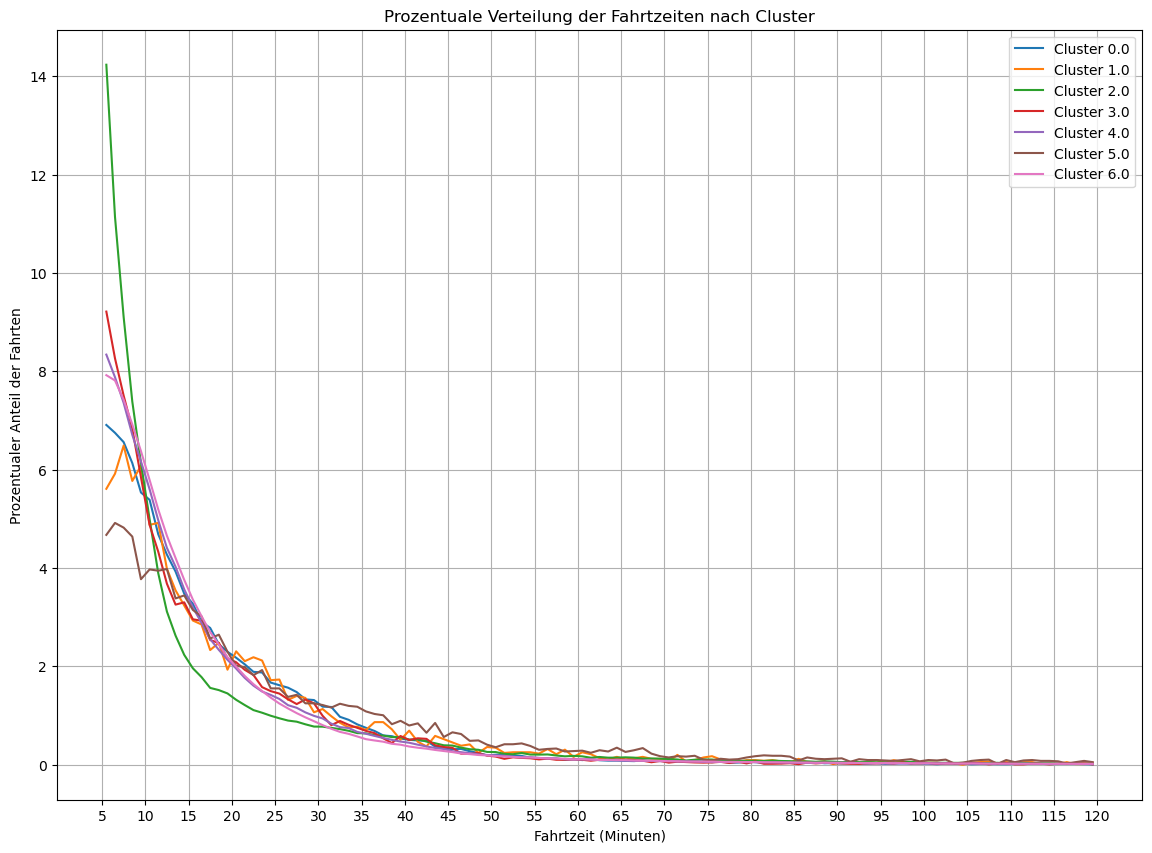

In [49]:
# Fahrtzeiten in Intervalle einteilen
df_filtered['time_interval'] = pd.cut(df_filtered['ride_duration'], bins=np.arange(5, 121, 1), right=False)

# Anzahl der Fahrten pro Intervall und Cluster berechnen
ride_counts_per_interval_cluster = df_filtered.groupby(['cluster', 'time_interval']).size().unstack(fill_value=0)

# Gesamtanzahl der Fahrten pro Cluster
total_rides_per_cluster = ride_counts_per_interval_cluster.sum(axis=1)

# Umwandlung in Prozent
percent_distribution_per_interval_cluster = (ride_counts_per_interval_cluster.T / total_rides_per_cluster).T * 100

# Visualisierung
plt.figure(figsize=(14, 10))
for cluster in percent_distribution_per_interval_cluster.index:
    plt.plot(percent_distribution_per_interval_cluster.columns.categories.mid, percent_distribution_per_interval_cluster.loc[cluster], label=f'Cluster {cluster}')

plt.xlabel('Fahrtzeit (Minuten)')
plt.ylabel('Prozentualer Anteil der Fahrten')
plt.title('Prozentuale Verteilung der Fahrtzeiten nach Cluster')
plt.legend()
plt.xticks(np.arange(5, 121, 5))
plt.grid(True)
plt.show()

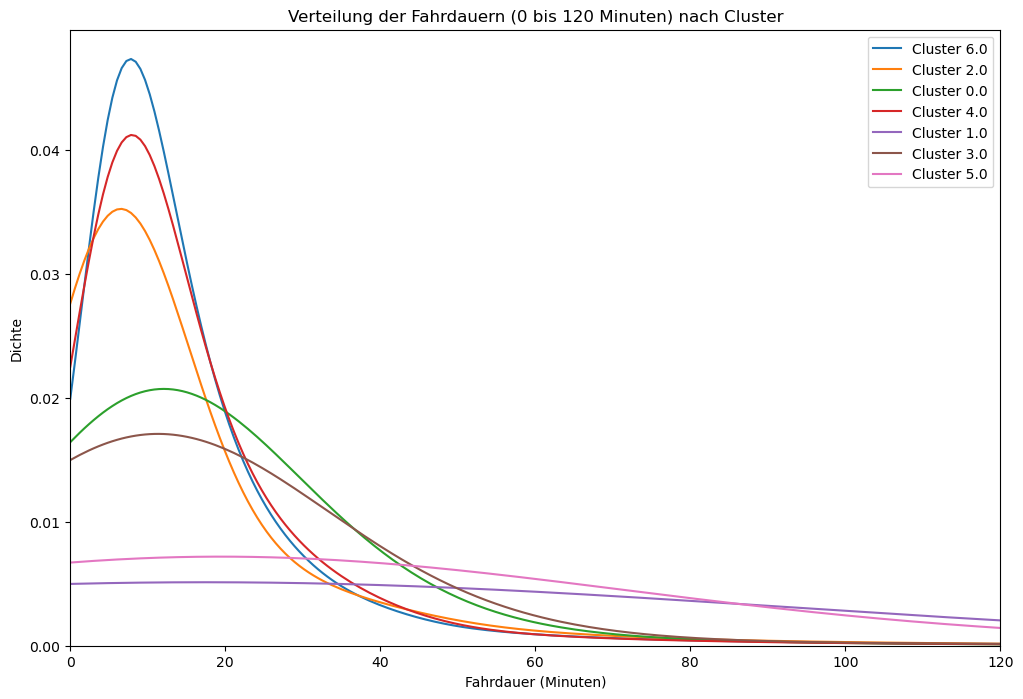

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Annahme: 'cluster' ist die Spalte, die die Cluster-Zugehörigkeit anzeigt
clusters = df_filtered['cluster'].unique()

plt.figure(figsize=(12, 8))

# Erstellung einer KDE-Linie für jeden Cluster
for cluster in clusters:
    subset = df[df['cluster'] == cluster]['ride_duration']
    sns.kdeplot(subset, bw_adjust=0.5, label=f'Cluster {cluster}', clip=(0, 120))

plt.title('Verteilung der Fahrdauern (0 bis 120 Minuten) nach Cluster')
plt.xlabel('Fahrdauer (Minuten)')
plt.ylabel('Dichte')
plt.xlim(0, 120)  # Beschränkung der X-Achse auf 0 bis 120 Minuten
plt.legend()  # Hinzufügen einer Legende, um die Cluster zu identifizieren

plt.show()


In [51]:
df_filtered

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,cluster,start_hour,ride_duration,time_interval
0,EC2DE40644C6B0F4,classic_bike,2022-05-23 23:06:58,2022-05-23 23:40:19,Wabash Ave & Grand Ave,TA1307000117,Halsted St & Roscoe St,TA1309000025,41.891466,-87.626761,41.943670,-87.648950,member,6.0,23,33.350000,"[33, 34)"
1,1C31AD03897EE385,classic_bike,2022-05-11 08:53:28,2022-05-11 09:31:22,DuSable Lake Shore Dr & Monroe St,13300,Field Blvd & South Water St,15534,41.880958,-87.616743,41.886349,-87.617517,member,6.0,8,37.900000,"[37, 38)"
2,1542FBEC830415CF,classic_bike,2022-05-26 18:36:28,2022-05-26 18:58:18,Clinton St & Madison St,TA1305000032,Wood St & Milwaukee Ave,13221,41.882242,-87.641066,41.907655,-87.672552,member,6.0,18,21.833333,"[21, 22)"
3,6FF59852924528F8,classic_bike,2022-05-10 07:30:07,2022-05-10 07:38:49,Clinton St & Madison St,TA1305000032,Clark St & Randolph St,TA1305000030,41.882242,-87.641066,41.884576,-87.631890,member,6.0,7,8.700000,"[8, 9)"
4,483C52CAAE12E3AC,classic_bike,2022-05-10 17:31:56,2022-05-10 17:36:57,Clinton St & Madison St,TA1305000032,Morgan St & Lake St,TA1306000015,41.882242,-87.641066,41.885779,-87.651025,member,6.0,17,5.016667,"[5, 6)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5859054,9BCF1E8BA027EAFA,electric_bike,2023-04-21 07:15:06,2023-04-21 07:41:45,Richmond St & Diversey Ave,15645,Clark St & Ida B Wells Dr,TA1305000009,41.931933,-87.701263,41.875933,-87.630585,member,4.0,7,26.650000,"[26, 27)"
5859056,8B441A6C436E9900,classic_bike,2023-04-29 21:20:21,2023-04-29 21:30:19,Halsted St & 18th St,13099,Blue Island Ave & 18th St,13135,41.857506,-87.645991,41.857556,-87.661535,casual,6.0,21,9.966667,"[9, 10)"
5859057,3980D64BE11540F1,classic_bike,2023-04-24 09:16:05,2023-04-24 09:22:27,Halsted St & 18th St,13099,Blue Island Ave & 18th St,13135,41.857506,-87.645991,41.857556,-87.661535,casual,6.0,9,6.366667,"[6, 7)"
5859058,3EF4B49FF7DAA02C,classic_bike,2023-04-18 07:53:51,2023-04-18 07:59:16,Franklin St & Jackson Blvd,TA1305000025,Clark St & Randolph St,TA1305000030,41.877708,-87.635321,41.884576,-87.631890,casual,6.0,7,5.416667,"[5, 6)"


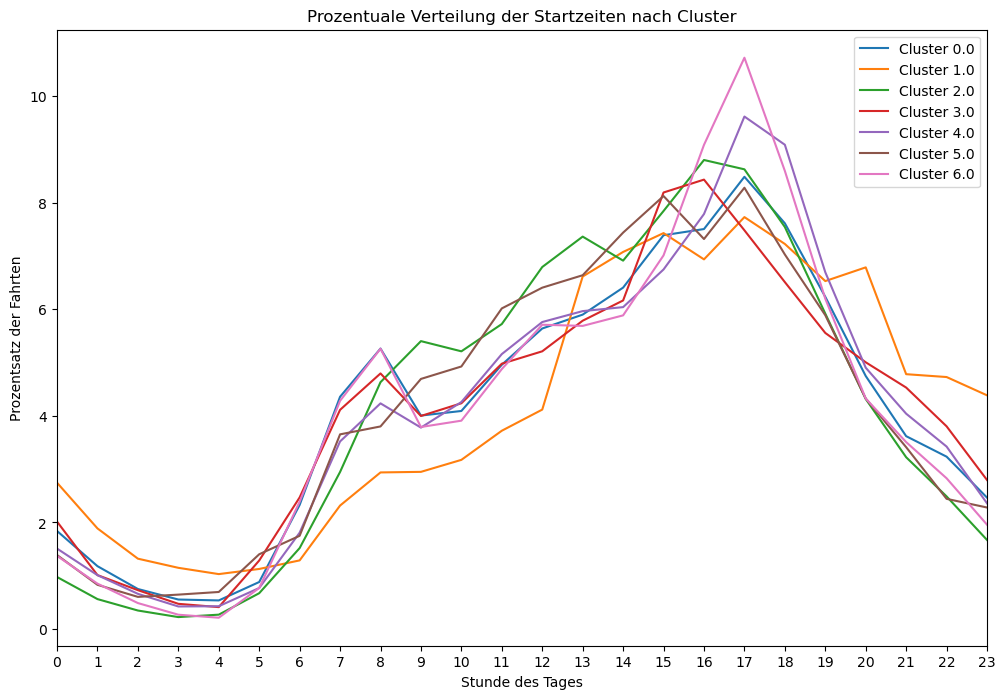

In [39]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Stellen Sie sicher, dass 'started_at' im datetime-Format ist
df['started_at'] = pd.to_datetime(df['started_at'])

# Extrahieren der Stunde aus der 'started_at' Spalte
df['start_hour'] = df['started_at'].dt.hour

# Berechnen der Anzahl der Fahrten pro Stunde und Cluster
hourly_rides = df.groupby(['cluster', 'start_hour']).size().reset_index(name='ride_count')

# Normalisieren der Fahrtanzahlen pro Cluster, um Prozentsätze zu erhalten
hourly_rides['total_rides_per_cluster'] = hourly_rides.groupby('cluster')['ride_count'].transform('sum')
hourly_rides['percentage'] = (hourly_rides['ride_count'] / hourly_rides['total_rides_per_cluster']) * 100

plt.figure(figsize=(12, 8))

# Erstellung eines Linienplots für jeden Cluster
clusters = hourly_rides['cluster'].unique()
for cluster in clusters:
    subset = hourly_rides[hourly_rides['cluster'] == cluster]
    plt.plot(subset['start_hour'], subset['percentage'], label=f'Cluster {cluster}')

plt.title('Prozentuale Verteilung der Startzeiten nach Cluster')
plt.xlabel('Stunde des Tages')
plt.ylabel('Prozentsatz der Fahrten')
plt.xlim(0, 23)  # Beschränkung der X-Achse auf die Stunden des Tages
plt.xticks(range(0, 24))  # Stellen Sie sicher, dass alle Stunden auf der X-Achse markiert sind
plt.legend()  # Hinzufügen einer Legende zur Identifikation der Cluster

plt.show()



In [20]:
# Annahme: 'unique_stations' und 'poi_counts_df' sind Ihre DataFrames
# 'start_station_name' ist in beiden DataFrames vorhanden und dient als Schlüssel für den Merge

# Zusammenführen der DataFrames
merged_df = pd.merge(unique_stations, poi_counts_df, on='start_station_name', how='left')

# Überprüfen der ersten Zeilen des zusammengeführten DataFrames
print(merged_df.head())


             start_station_name           ride_id  rideable_type  \
0      10101 S Stony Island Ave  F715C83C9A4E9B18  electric_bike   
1  111th St - Morgan Park Metra  54932094E964F02A  electric_bike   
2           2112 W Peterson Ave  0B3343C0A131B87E  electric_bike   
3                           410  0DA511E177690708  electric_bike   
4                 532 E 43rd St  66C14540F47D3BE4  electric_bike   

            started_at             ended_at start_station_id  \
0  2022-08-13 19:58:36  2022-08-13 20:25:52              922   
1  2022-05-09 16:50:29  2022-05-09 16:57:23              682   
2  2022-05-07 13:39:17  2022-05-07 14:06:41     KA1504000155   
3  2023-04-27 07:36:16  2023-04-27 07:48:35              410   
4  2022-05-27 10:53:54  2022-05-27 11:07:59              913   

             end_station_name end_station_id  start_lat  start_lng  ...  \
0      Phillips Ave & 83rd St            582  41.710000   -87.5800  ...   
1      Walden Pkwy & 103rd St            693  41.690000 

In [21]:
merged_df

,start_station_name,ride_id,rideable_type,started_at,ended_at,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,member_casual,cluster,Business_Industrial,Food_Drink,Leisure,Other,Residential,Shopping,Sport_Activity,Transport_Mobility
0,10101 S Stony Island Ave,F715C83C9A4E9B18,electric_bike,2022-08-13 19:58:36,2022-08-13 20:25:52,922,Phillips Ave & 83rd St,582,41.710000,-87.580000,...,casual,5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,111th St - Morgan Park Metra,54932094E964F02A,electric_bike,2022-05-09 16:50:29,2022-05-09 16:57:23,682,Walden Pkwy & 103rd St,693,41.690000,-87.670000,...,member,1,0.0,0.0,0.0,21.0,0.0,0.0,0.0,0.0
2,2112 W Peterson Ave,0B3343C0A131B87E,electric_bike,2022-05-07 13:39:17,2022-05-07 14:06:41,KA1504000155,Broadway & Berwyn Ave,13109,41.991189,-87.683500,...,member,4,0.0,0.0,0.0,0.0,0.0,17.0,0.0,0.0
3,410,0DA511E177690708,electric_bike,2023-04-27 07:36:16,2023-04-27 07:48:35,410,LaSalle St & Washington St,13006,41.900000,-87.690000,...,casual,6,0.0,0.0,0.0,0.0,0.0,23.0,0.0,0.0
4,532 E 43rd St,66C14540F47D3BE4,electric_bike,2022-05-27 10:53:54,2022-05-27 11:07:59,913,MLK Jr Dr & 29th St,TA1307000139,41.820000,-87.610000,...,casual,2,0.0,0.0,0.0,0.0,30.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1717,Yale Ave & 119th St,C709DDFE42370ABF,electric_bike,2022-07-12 14:22:38,2022-07-12 14:32:07,588,State St & 123rd St,20210,41.680000,-87.630000,...,casual,1,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0
1718,Yates Blvd & 75th St,C8F57483B95F50C9,electric_bike,2022-05-26 21:24:24,2022-05-26 21:28:24,KA1503000024,Jeffery Blvd & 71st St,KA1503000018,41.758742,-87.566428,...,member,5,0.0,0.0,0.0,0.0,0.0,36.0,0.0,0.0
1719,Yates Blvd & 93rd St,B890FDC60ACC660B,classic_bike,2022-05-13 14:21:13,2022-05-13 14:26:38,20237,Clyde Ave & 87th St,20230,41.726166,-87.566276,...,member,5,0.0,0.0,0.0,20.0,0.0,0.0,0.0,0.0
1720,Yates Blvd & Exchange Ave,AFCC16606B0289C7,electric_bike,2022-05-24 15:21:28,2022-05-24 15:46:12,905,Harper Ave & 59th St,KA1503000070,41.770000,-87.570000,...,member,5,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0


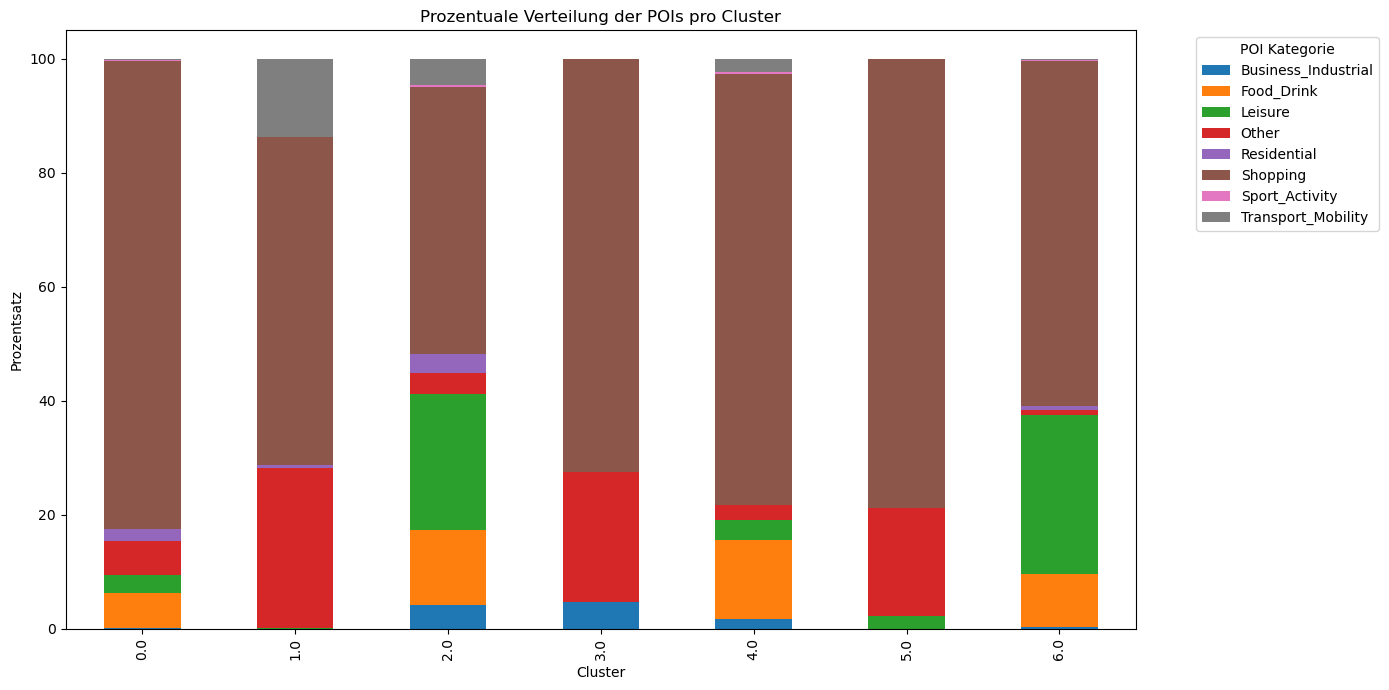

In [53]:
import matplotlib.pyplot as plt
import pandas as pd

# Annahme: df_filtered und poi_counts_df sind bereits definiert und vorbereitet

# Schritt 1: Verbinden der DataFrames auf Basis von start_station_name
merged_df = pd.merge(df_filtered, poi_counts_df, on='start_station_name', how='left')

# Schritt 2: Berechnen der Summe der POIs pro Cluster
poi_sum_per_cluster = merged_df.groupby('cluster')[['Business_Industrial', 'Food_Drink', 'Leisure', 'Other', 'Residential', 'Shopping', 'Sport_Activity', 'Transport_Mobility']].sum()

# Schritt 3: Umwandlung der absoluten Zahlen in prozentuale Anteile
poi_percentage_per_cluster = poi_sum_per_cluster.div(poi_sum_per_cluster.sum(axis=1), axis=0) * 100

# Schritt 4: Visualisierung der prozentualen Verteilung der POIs pro Cluster
poi_percentage_per_cluster.plot(kind='bar', stacked=True, figsize=(14, 7))
plt.title('Prozentuale Verteilung der POIs pro Cluster')
plt.ylabel('Prozentsatz')
plt.xlabel('Cluster')
plt.legend(title='POI Kategorie', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()


In [54]:
import pandas as pd

# Angenommen df_filtered und poi_counts_df sind bereits definiert

# Zusammenführen der DataFrames auf Basis der 'start_station_name'
merged_df = pd.merge(df_filtered, poi_counts_df, on='start_station_name', how='left')

# Berechnung der Prozentwerte pro Cluster (Schritt 2 exemplarisch für einen POI-Typ)
cluster_pois = merged_df.groupby('cluster')['Business_Industrial'].sum()
total_pois = cluster_pois.sum()
percent_pois = cluster_pois / total_pois * 100

print(percent_pois)

# Visualisierung auf der Karte (Schritt 3 angedeutet)
# Dies erfordert Installierung und Importierung der Folium-Bibliothek
import folium

# Erstellung einer Karte
m = folium.Map(location=[41.8781, -87.6298], zoom_start=11)

# Hinzufügen von Punkten basierend auf den POIs und Clustern
for index, row in merged_df.iterrows():
    folium.CircleMarker(
        location=[row['start_lat'], row['start_lng']],
        radius=5, # Größe kann basierend auf dem Prozentwert angepasst werden
        popup=f"Cluster: {row['cluster']}, POIs: {row['Business_Industrial']}", # Anpassen basierend auf den POIs
        color='blue', # Farbe kann basierend auf dem Cluster angepasst werden
        fill=True,
    ).add_to(m)

# Anzeigen der Karte
m


cluster
0.0     0.292922
1.0     0.000000
2.0    19.466205
3.0     1.887040
4.0    31.851892
5.0     0.002261
6.0    46.499680
Name: Business_Industrial, dtype: float64


In [22]:
# Gruppieren des DataFrames nach 'cluster' und Berechnen der Summe für jede POI-Kategorie
poi_sum_per_cluster = merged_df.groupby('cluster')[['Business_Industrial', 'Food_Drink', 'Leisure', 'Other', 'Residential', 'Shopping', 'Sport_Activity', 'Transport_Mobility']].sum()

# Anzeigen der Ergebnisse
print(poi_sum_per_cluster)


         Business_Industrial  Food_Drink  Leisure   Other  Residential  \
cluster                                                                  
0                       32.0        38.0    131.0   896.0         43.0   
1                        0.0         0.0     34.0  1454.0         23.0   
2                      478.0       298.0    266.0  1208.0        179.0   
3                      186.0         0.0      0.0  1793.0          0.0   
4                      188.0       371.0    214.0   394.0          0.0   
5                       24.0         0.0     69.0   942.0          0.0   
6                      186.0      3057.0   7731.0   610.0       2185.0   

         Shopping  Sport_Activity  Transport_Mobility  
cluster                                                
0          3776.0            22.0               114.0  
1          1889.0             0.0                25.0  
2          2776.0           168.0                82.0  
3          3528.0             0.0                 0.0

In [23]:
station_count_per_cluster = merged_df.groupby('cluster')['start_station_name'].nunique()
poi_percentage_per_cluster = poi_sum_per_cluster.div(station_count_per_cluster, axis='index') * 100


In [25]:
total_pois_per_cluster = poi_sum_per_cluster.sum(axis=1)
poi_percentage_per_cluster = (poi_sum_per_cluster.div(total_pois_per_cluster, axis='index')) * 100


In [26]:
poi_percentage_per_cluster

,Business_Industrial,Food_Drink,Leisure,Other,Residential,Shopping,Sport_Activity,Transport_Mobility
cluster,,,,,,,,
0,0.633413,0.752177,2.593032,17.735550,0.851148,74.742676,0.435471,2.256532
1,0.000000,0.000000,0.992701,42.452555,0.671533,55.153285,0.000000,0.729927
2,8.762603,5.462878,4.876260,22.144821,3.281393,50.889093,3.079743,1.503208
3,3.377520,0.000000,0.000000,32.558562,0.000000,64.063919,0.000000,0.000000
4,2.474661,4.883507,2.816901,5.186258,0.000000,83.296038,0.368567,0.974069
5,0.797872,0.000000,2.293883,31.316489,0.000000,65.359043,0.000000,0.232713
6,0.547558,8.999382,22.758986,1.795755,6.432335,59.039124,0.111867,0.314993


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,EC2DE40644C6B0F4,classic_bike,2022-05-23 23:06:58,2022-05-23 23:40:19,Wabash Ave & Grand Ave,TA1307000117,Halsted St & Roscoe St,TA1309000025,41.891466,-87.626761,41.943670,-87.648950,member
1,1C31AD03897EE385,classic_bike,2022-05-11 08:53:28,2022-05-11 09:31:22,DuSable Lake Shore Dr & Monroe St,13300,Field Blvd & South Water St,15534,41.880958,-87.616743,41.886349,-87.617517,member
2,1542FBEC830415CF,classic_bike,2022-05-26 18:36:28,2022-05-26 18:58:18,Clinton St & Madison St,TA1305000032,Wood St & Milwaukee Ave,13221,41.882242,-87.641066,41.907655,-87.672552,member
3,6FF59852924528F8,classic_bike,2022-05-10 07:30:07,2022-05-10 07:38:49,Clinton St & Madison St,TA1305000032,Clark St & Randolph St,TA1305000030,41.882242,-87.641066,41.884576,-87.631890,member
4,483C52CAAE12E3AC,classic_bike,2022-05-10 17:31:56,2022-05-10 17:36:57,Clinton St & Madison St,TA1305000032,Morgan St & Lake St,TA1306000015,41.882242,-87.641066,41.885779,-87.651025,member
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5859056,8B441A6C436E9900,classic_bike,2023-04-29 21:20:21,2023-04-29 21:30:19,Halsted St & 18th St,13099,Blue Island Ave & 18th St,13135,41.857506,-87.645991,41.857556,-87.661535,casual
5859057,3980D64BE11540F1,classic_bike,2023-04-24 09:16:05,2023-04-24 09:22:27,Halsted St & 18th St,13099,Blue Island Ave & 18th St,13135,41.857506,-87.645991,41.857556,-87.661535,casual
5859058,3EF4B49FF7DAA02C,classic_bike,2023-04-18 07:53:51,2023-04-18 07:59:16,Franklin St & Jackson Blvd,TA1305000025,Clark St & Randolph St,TA1305000030,41.877708,-87.635321,41.884576,-87.631890,casual
5859059,210B2ED6583DC231,classic_bike,2023-04-29 07:33:55,2023-04-29 07:38:57,Michigan Ave & Lake St,TA1305000011,Clark St & Randolph St,TA1305000030,41.886022,-87.624398,41.884576,-87.631890,casual


In [34]:
# Berechnen Sie die durchschnittliche Fahrtzeit pro Cluster
df['ride_duration'] = (df['ended_at'] - df['started_at']).dt.total_seconds() / 60  # Fahrtzeit in Minuten
average_ride_duration_per_cluster = df.groupby('cluster')['ride_duration'].mean()


In [35]:
average_ride_duration_per_cluster

cluster
0.0    27.368980
1.0    97.176586
2.0    20.312853
3.0    29.670780
4.0    19.025877
5.0    80.791842
6.0    19.390696
Name: ride_duration, dtype: float64

# Extrahieren Sie die Stunde der Startzeit
df['start_hour'] = df['started_at'].dt.hour
start_time_distribution_per_cluster = df.groupby(['cluster', 'start_hour']).size().unstack(fill_value=0)


In [37]:
start_time_distribution_per_cluster

start_hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
cluster,,,,,,,,,,,,,,,,,,,,,
0.0,1835,1176,748,551,534,879,2323,4349,5252,3997,...,6394,7375,7491,8470,7599,6221,4738,3611,3227,2460
1.0,256,176,123,107,96,105,120,216,274,275,...,660,693,647,721,674,609,633,446,441,409
2.0,3077,1768,1091,702,846,2117,4791,9301,14622,17054,...,21824,24765,27787,27234,23816,18683,13627,10173,7853,5272
3.0,684,343,247,160,139,436,838,1396,1628,1357,...,2093,2781,2863,2540,2210,1886,1699,1538,1291,949
4.0,12045,8060,5262,3368,3403,6135,14423,28104,33811,30178,...,48235,53881,62188,76803,72575,53471,39153,32263,27335,18830
5.0,196,117,85,91,98,198,247,516,537,663,...,1051,1148,1034,1170,993,832,611,482,345,322
6.0,51506,31953,18239,10029,7907,28878,89727,160873,197622,142391,...,221110,263415,341341,402793,322981,232882,162471,131746,106239,73507


In [15]:
# Angenommen, `unique_stations` enthält eine Spalte `pois`, die Listen von POI-Kategorien enthält
# Wenn `pois` aktuell als Wörterbücher gespeichert sind, müssen Sie diese zuerst in Listen umwandeln

# Beispiel für die Konvertierung (anpassen basierend auf Ihrer tatsächlichen Datenstruktur)
unique_stations['poi_list'] = unique_stations['poi_categories'].apply(lambda x: list(x.keys()))


In [24]:
# Umwandeln in ein langes Format
#poi_long = unique_stations.explode('poi_list')

# Jetzt können wir die Anzahl der POIs pro Kategorie und Cluster zählen
poi_counts_per_cluster = poi_long.groupby(['cluster', 'poi_list']).size().unstack(fill_value=0)

# Finden der am meisten vertretenen POIs pro Cluster
most_represented_poi_per_cluster = poi_counts_per_cluster.idxmax(axis=1)
print(most_represented_poi_per_cluster)


cluster
0    Business_Industrial
1    Business_Industrial
2    Business_Industrial
3    Business_Industrial
4    Business_Industrial
5    Business_Industrial
6    Business_Industrial
dtype: object


In [17]:


# Explode der 'pois'-Spalte, um jede POI-Kategorie in eine eigene Zeile zu bringen
long_format = unique_stations.explode('poi_categories')

# Zählen der Vorkommen jedes POIs in jedem Cluster
poi_counts_per_cluster = long_format.groupby(['cluster', 'poi_categories']).size().unstack(fill_value=0)

# Ausgabe der Ergebnisse
print(poi_counts_per_cluster)


poi_categories  Business_Industrial  Education_Research  Food_Drink  \
cluster                                                               
0                               304                 304         304   
1                               223                 223         223   
2                               220                 220         220   
3                               239                 239         239   
4                               217                 217         217   
5                               179                 179         179   
6                               340                 340         340   

poi_categories  Health_Medical  Leisure  Other  Public_Service  Residential  \
cluster                                                                       
0                          304      304    304             304          304   
1                          223      223    223             223          223   
2                          220      220    2

In [23]:
# Angenommen, jede Zeile in `unique_stations` repräsentiert einen POI mit einer Kategorie ('poi_category') und einem Cluster ('cluster')
poi_counts = unique_stations.groupby(['cluster', 'pois']).size().unstack(fill_value=0)

# Alternativ, wenn `unique_stations` eine Spalte mit einer Liste von Kategorien pro Station enthält, müssen Sie zuerst `explode` verwenden
# Beispiel:
# long_format = unique_stations.explode('poi_list')
# poi_counts = long_format.groupby(['cluster', 'poi_list']).size().unstack(fill_value=0)

print(poi_counts)


TypeError: unhashable type: 'DataFrame'

In [27]:
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.heatmap(poi_counts_per_cluster, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Häufigkeit von POIs in Clustern')
plt.xlabel('POIs')
plt.ylabel('Cluster')
plt.show()


NameError: name 'poi_counts_per_cluster' is not defined

<Figure size 1200x800 with 0 Axes>